One of my favorite task when I deal with large datasets that contains individuals and a lot of variables is to reduce the dimensionality so to understand which factors differentiate the most these individuals. There exists a lot of dimensionality reduction techniques but the most used is the Principal Components Ananlysis. After using PCA for most of my projects I discovered in this [Kaggle](https://www.kaggle.com/cherzy/spatial-representation-and-dim-reduction-t-sne) kernel a new technique that immediately raises my interest and I would like to use this new technique to analyse happiness in the world.  
I am going to work on a dataset from `Sustainable Development Solutions Network` which is hosted on here on [Kaggle](https://www.kaggle.com/unsdsn/world-happiness/downloads/world-happiness-report.zip/2). 

In [62]:
## Loading the libraries
options(warn = -1)
suppressPackageStartupMessages(library(Rtsne))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(GGally))

In [5]:
dataset <- read_csv("2017.csv")

Parsed with column specification:
cols(
  Country = col_character(),
  Happiness.Rank = col_double(),
  Happiness.Score = col_double(),
  Whisker.high = col_double(),
  Whisker.low = col_double(),
  Economy..GDP.per.Capita. = col_double(),
  Family = col_double(),
  Health..Life.Expectancy. = col_double(),
  Freedom = col_double(),
  Generosity = col_double(),
  Trust..Government.Corruption. = col_double(),
  Dystopia.Residual = col_double()
)


In [6]:
glimpse(dataset)

Observations: 155
Variables: 12
$ Country                       <chr> "Norway", "Denmark", "Iceland", "Swit...
$ Happiness.Rank                <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...
$ Happiness.Score               <dbl> 7.537, 7.522, 7.504, 7.494, 7.469, 7....
$ Whisker.high                  <dbl> 7.594445, 7.581728, 7.622030, 7.56177...
$ Whisker.low                   <dbl> 7.479556, 7.462272, 7.385970, 7.42622...
$ Economy..GDP.per.Capita.      <dbl> 1.616463, 1.482383, 1.480633, 1.56498...
$ Family                        <dbl> 1.533524, 1.551122, 1.610574, 1.51691...
$ Health..Life.Expectancy.      <dbl> 0.7966665, 0.7925655, 0.8335521, 0.85...
$ Freedom                       <dbl> 0.6354226, 0.6260067, 0.6271626, 0.62...
$ Generosity                    <dbl> 0.36201224, 0.35528049, 0.47554022, 0...
$ Trust..Government.Corruption. <dbl> 0.31596383, 0.40077007, 0.15352656, 0...
$ Dystopia.Residual             <dbl> 2.277027, 2.313707, 2.322715, 2.27671...


The dataset contains 155 countries with 12 socio-economic variables. All the columns, except the country names, are numeric.

In [9]:
head(dataset)

Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,2.313707
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,2.322715
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073,2.276716
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115,2.430182
Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.8106961,0.5853845,0.4704898,0.2826618,2.294804


Are there any missing value?

In [10]:
map_int(dataset, function(x) sum(is.na(x)))

Country                Happiness.Rank 
                            0                             0 
              Happiness.Score                  Whisker.high 
                            0                             0 
                  Whisker.low      Economy..GDP.per.Capita. 
                            0                             0 
                       Family      Health..Life.Expectancy. 
                            0                             0 
                      Freedom                    Generosity 
                            0                             0 
Trust..Government.Corruption.             Dystopia.Residual 
                            0                             0

We are good to go because there is not missing data in the dataset.

In [17]:
# Remove the country column (non numeric) and transform the dataset to matrix
matrix_df <- dataset %>% select(-Country) %>% as.matrix

In [45]:
tsne <- Rtsne(matrix_df, perplexity = 20, pca = F)

The tsne object contains the results of which `Y` which stores the dimensionality reduction. I'm going to store them in a tibble and bind them together with the initial dataset.

In [49]:
results <- as_tibble(tsne$Y) %>% rename("dim1" = "V1", "dim2" = "V2") %>%
bind_cols(dataset)

In [50]:
head(results)

dim1,dim2,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
-12.99386,12.02412,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027
-13.17428,11.87064,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,2.313707
-13.31577,11.67545,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,2.322715
-12.70514,11.70555,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073,2.276716
-12.47832,11.54882,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115,2.430182
-12.60136,11.35498,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.8106961,0.5853845,0.4704898,0.2826618,2.294804


In [90]:
tsne_hexmap <- function(data = results, name = NULL, variable) {
    ggplot() +
  stat_summary_hex(data = data, 
                   aes_string(x="dim1", y="dim2", z =  variable), 
                   bins=10, fun = mean, alpha = 0.9) +
  geom_point(data = results, aes_string(x = "dim1", y = "dim2"), 
             alpha = 0.3, size = 1, col = 'black') +
    scale_fill_gradient(high = 'lightgreen', low = 'red', name=name) +
  coord_fixed(ratio = 1) +
  theme_void() +
geom_text_repel(data = data, 
                aes_string(x = "dim1", y = "dim2", label = "Country"), 
                size = 1.7, col = 'black') +
    theme(plot.title = element_text(hjust = 0.5),
       legend.title.align=0.5)
}

## Happiness

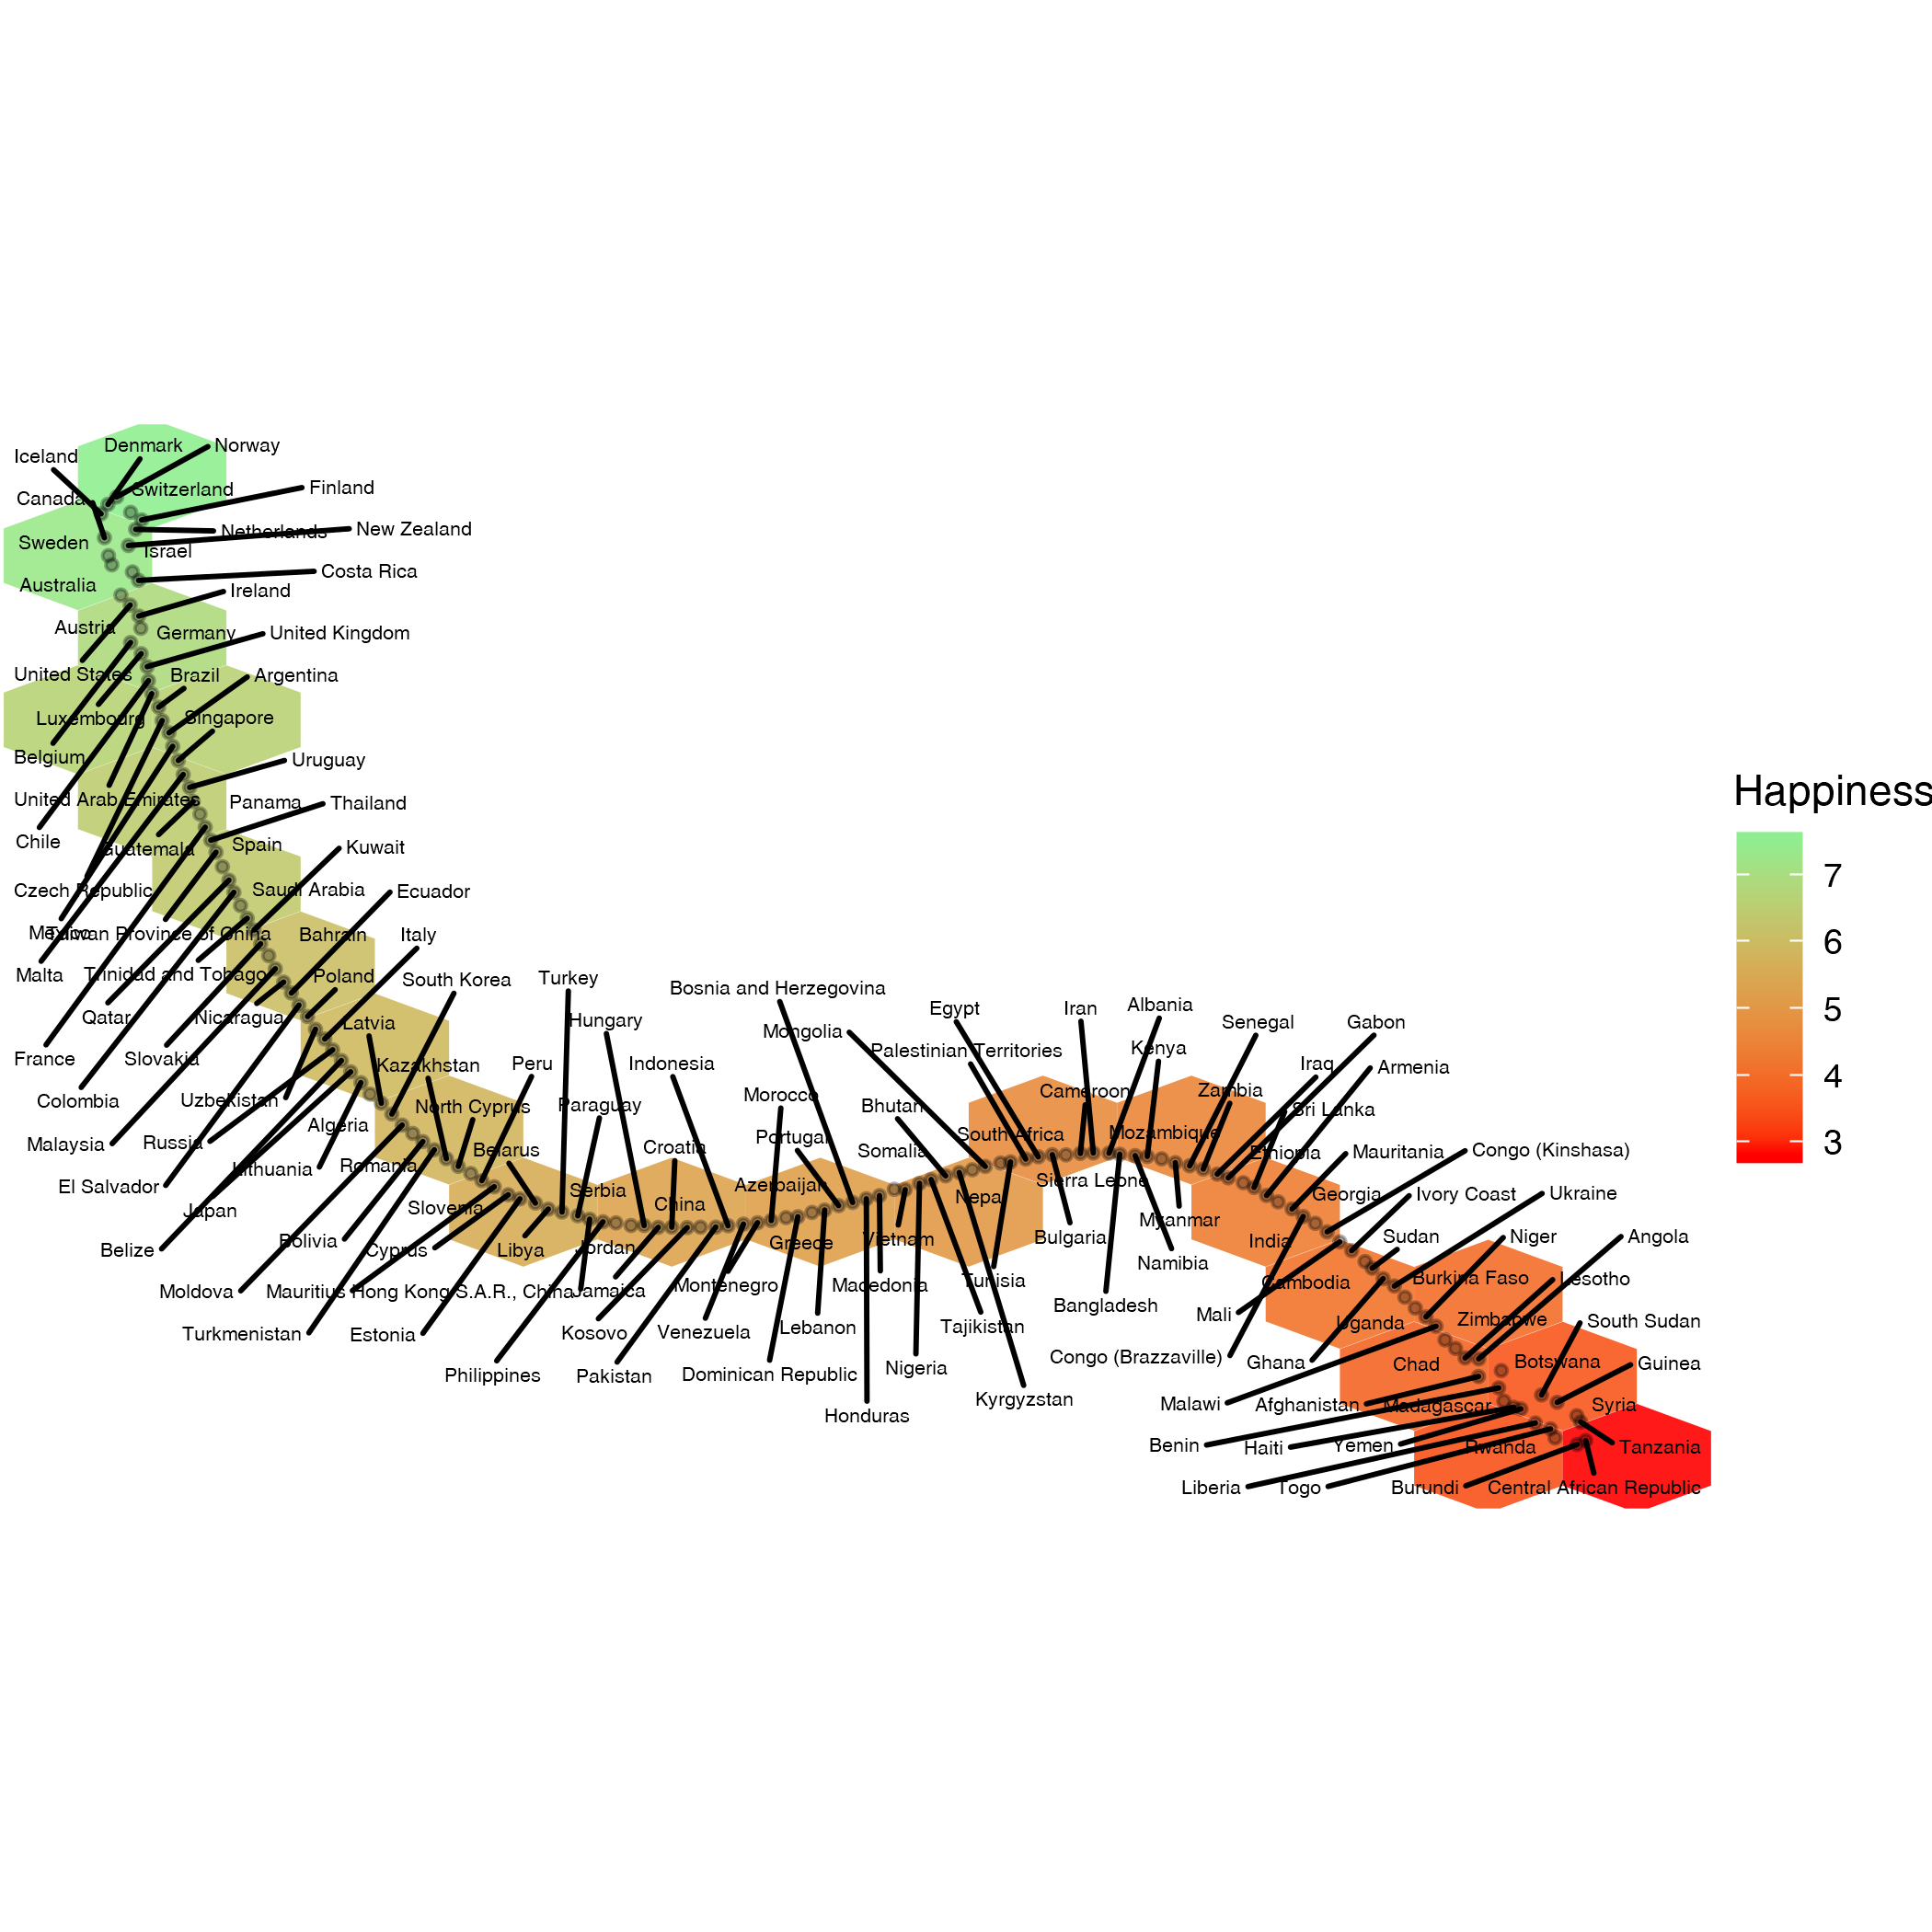

In [91]:
tsne_hexmap(name = "Happiness", variable = "Happiness.Score")

## Freedom

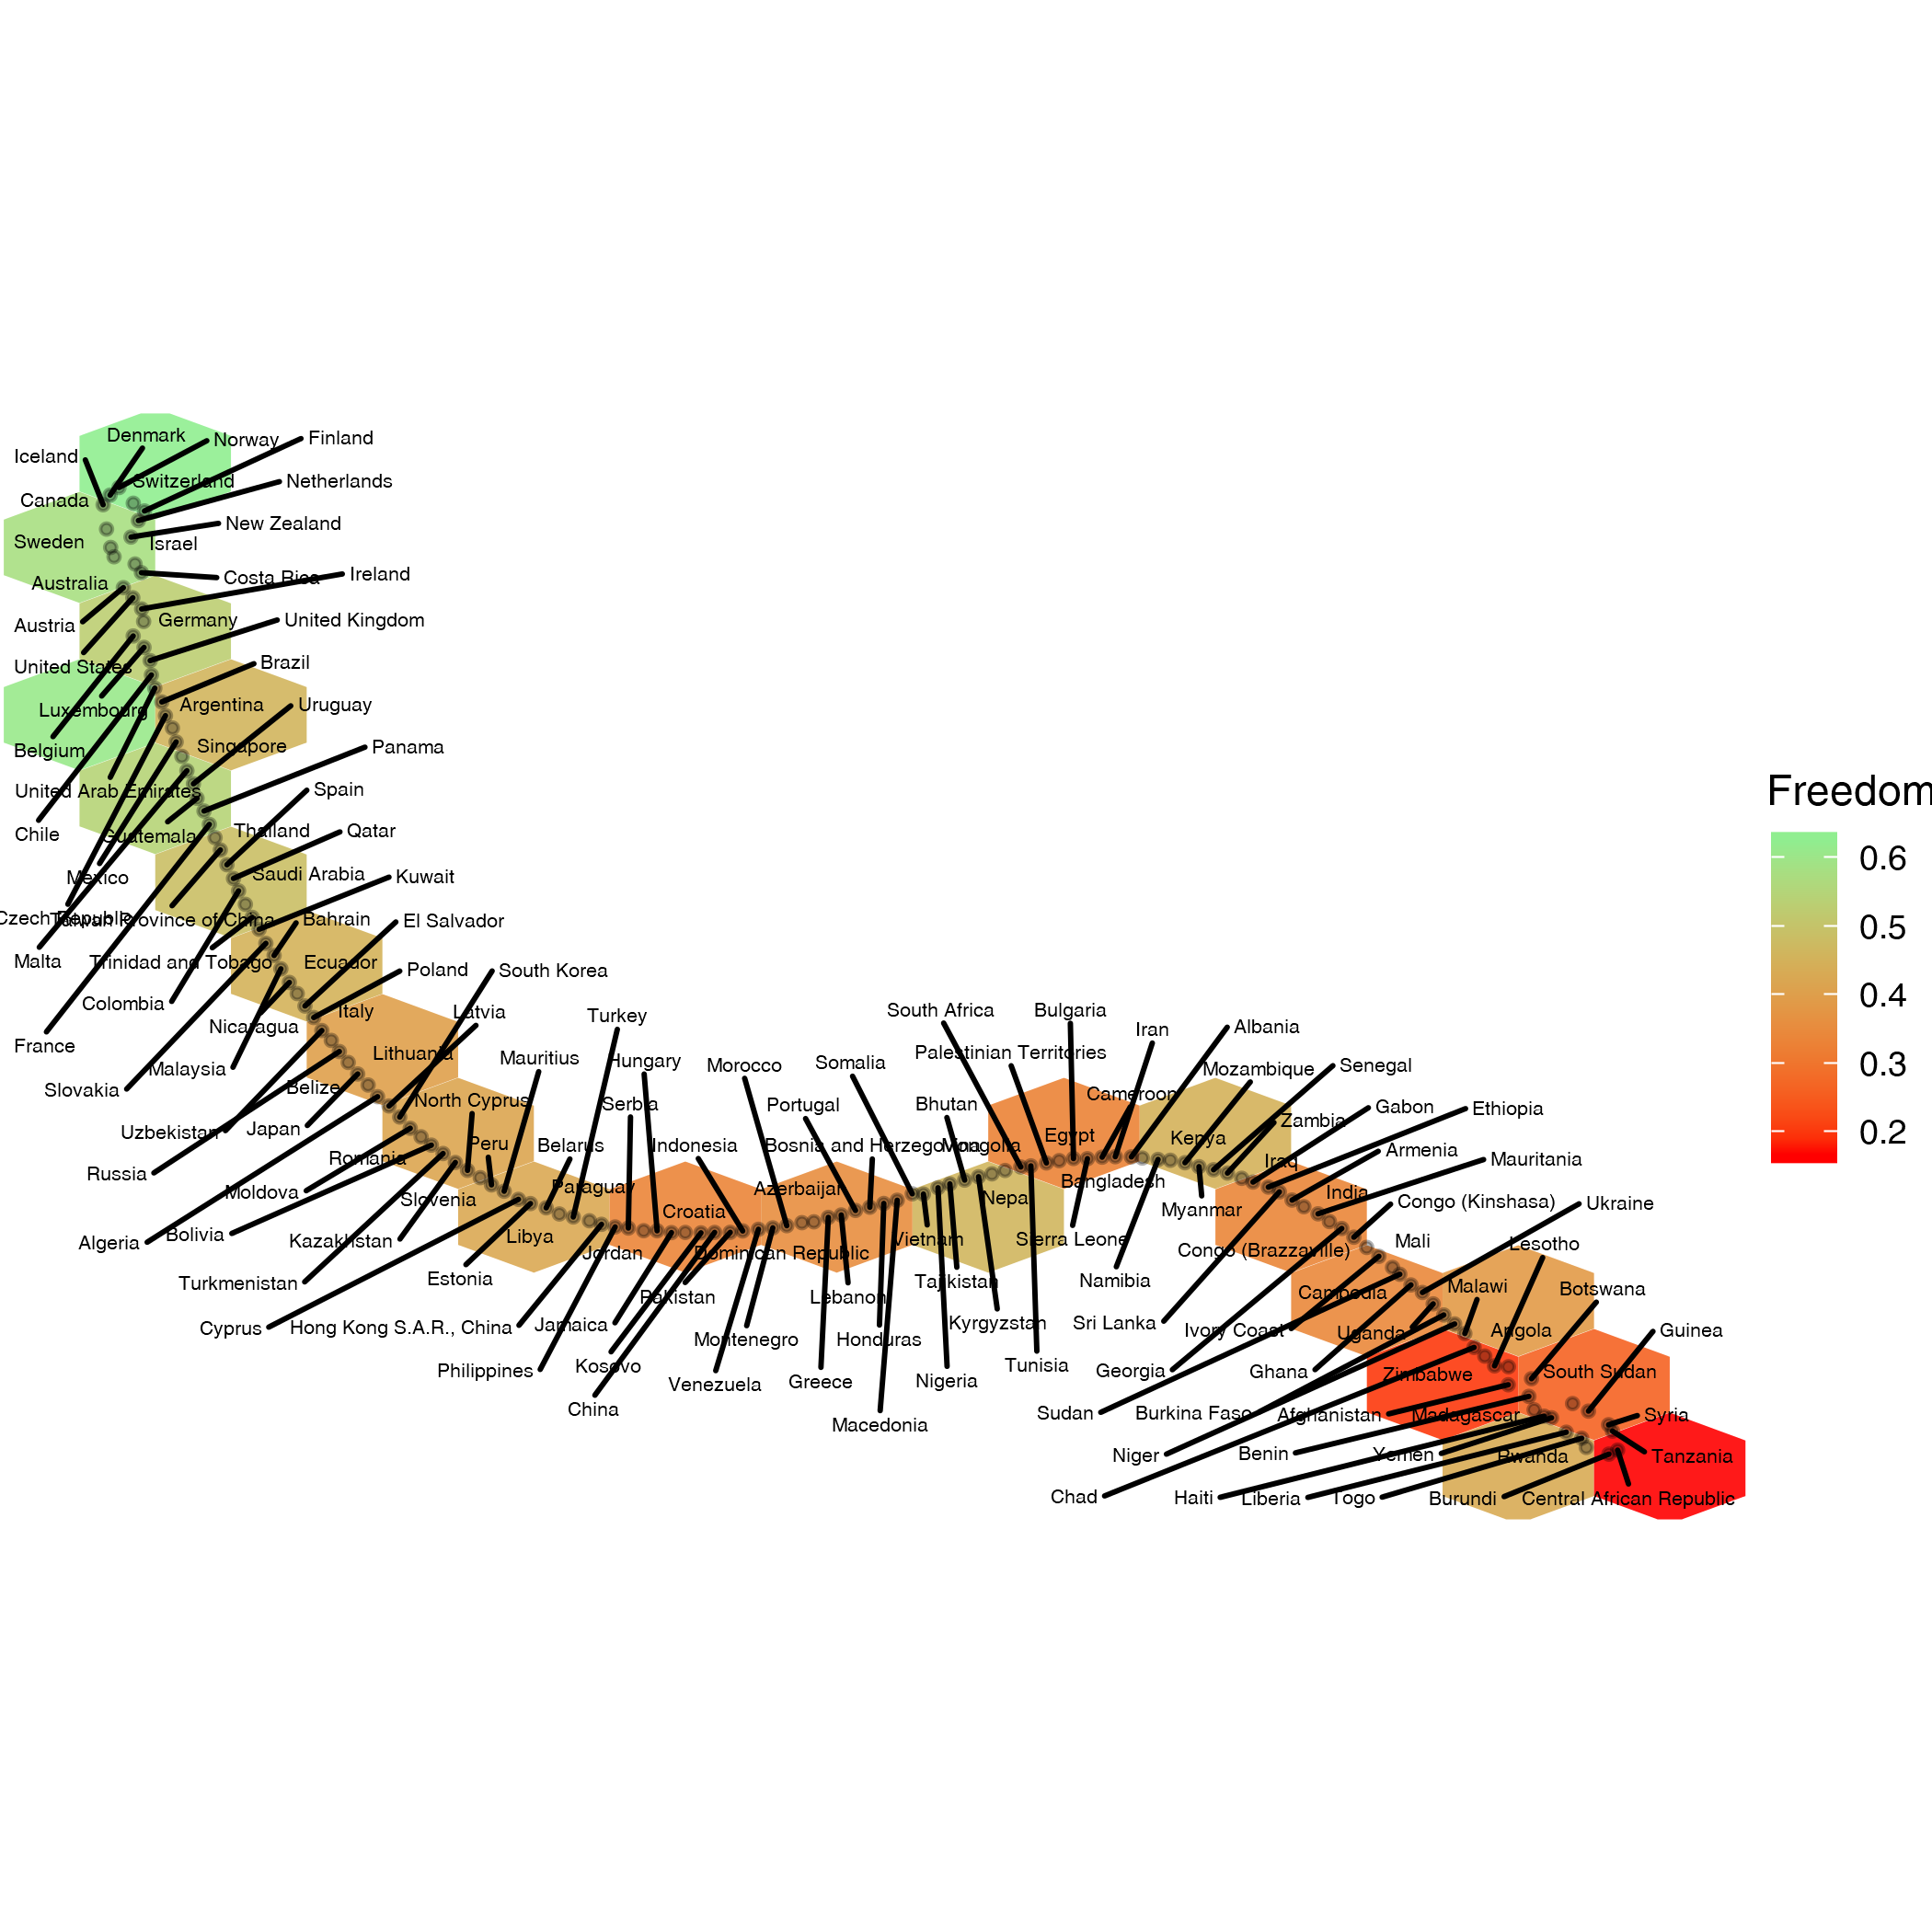

In [92]:
tsne_hexmap(name = "Freedom", variable = "Freedom")

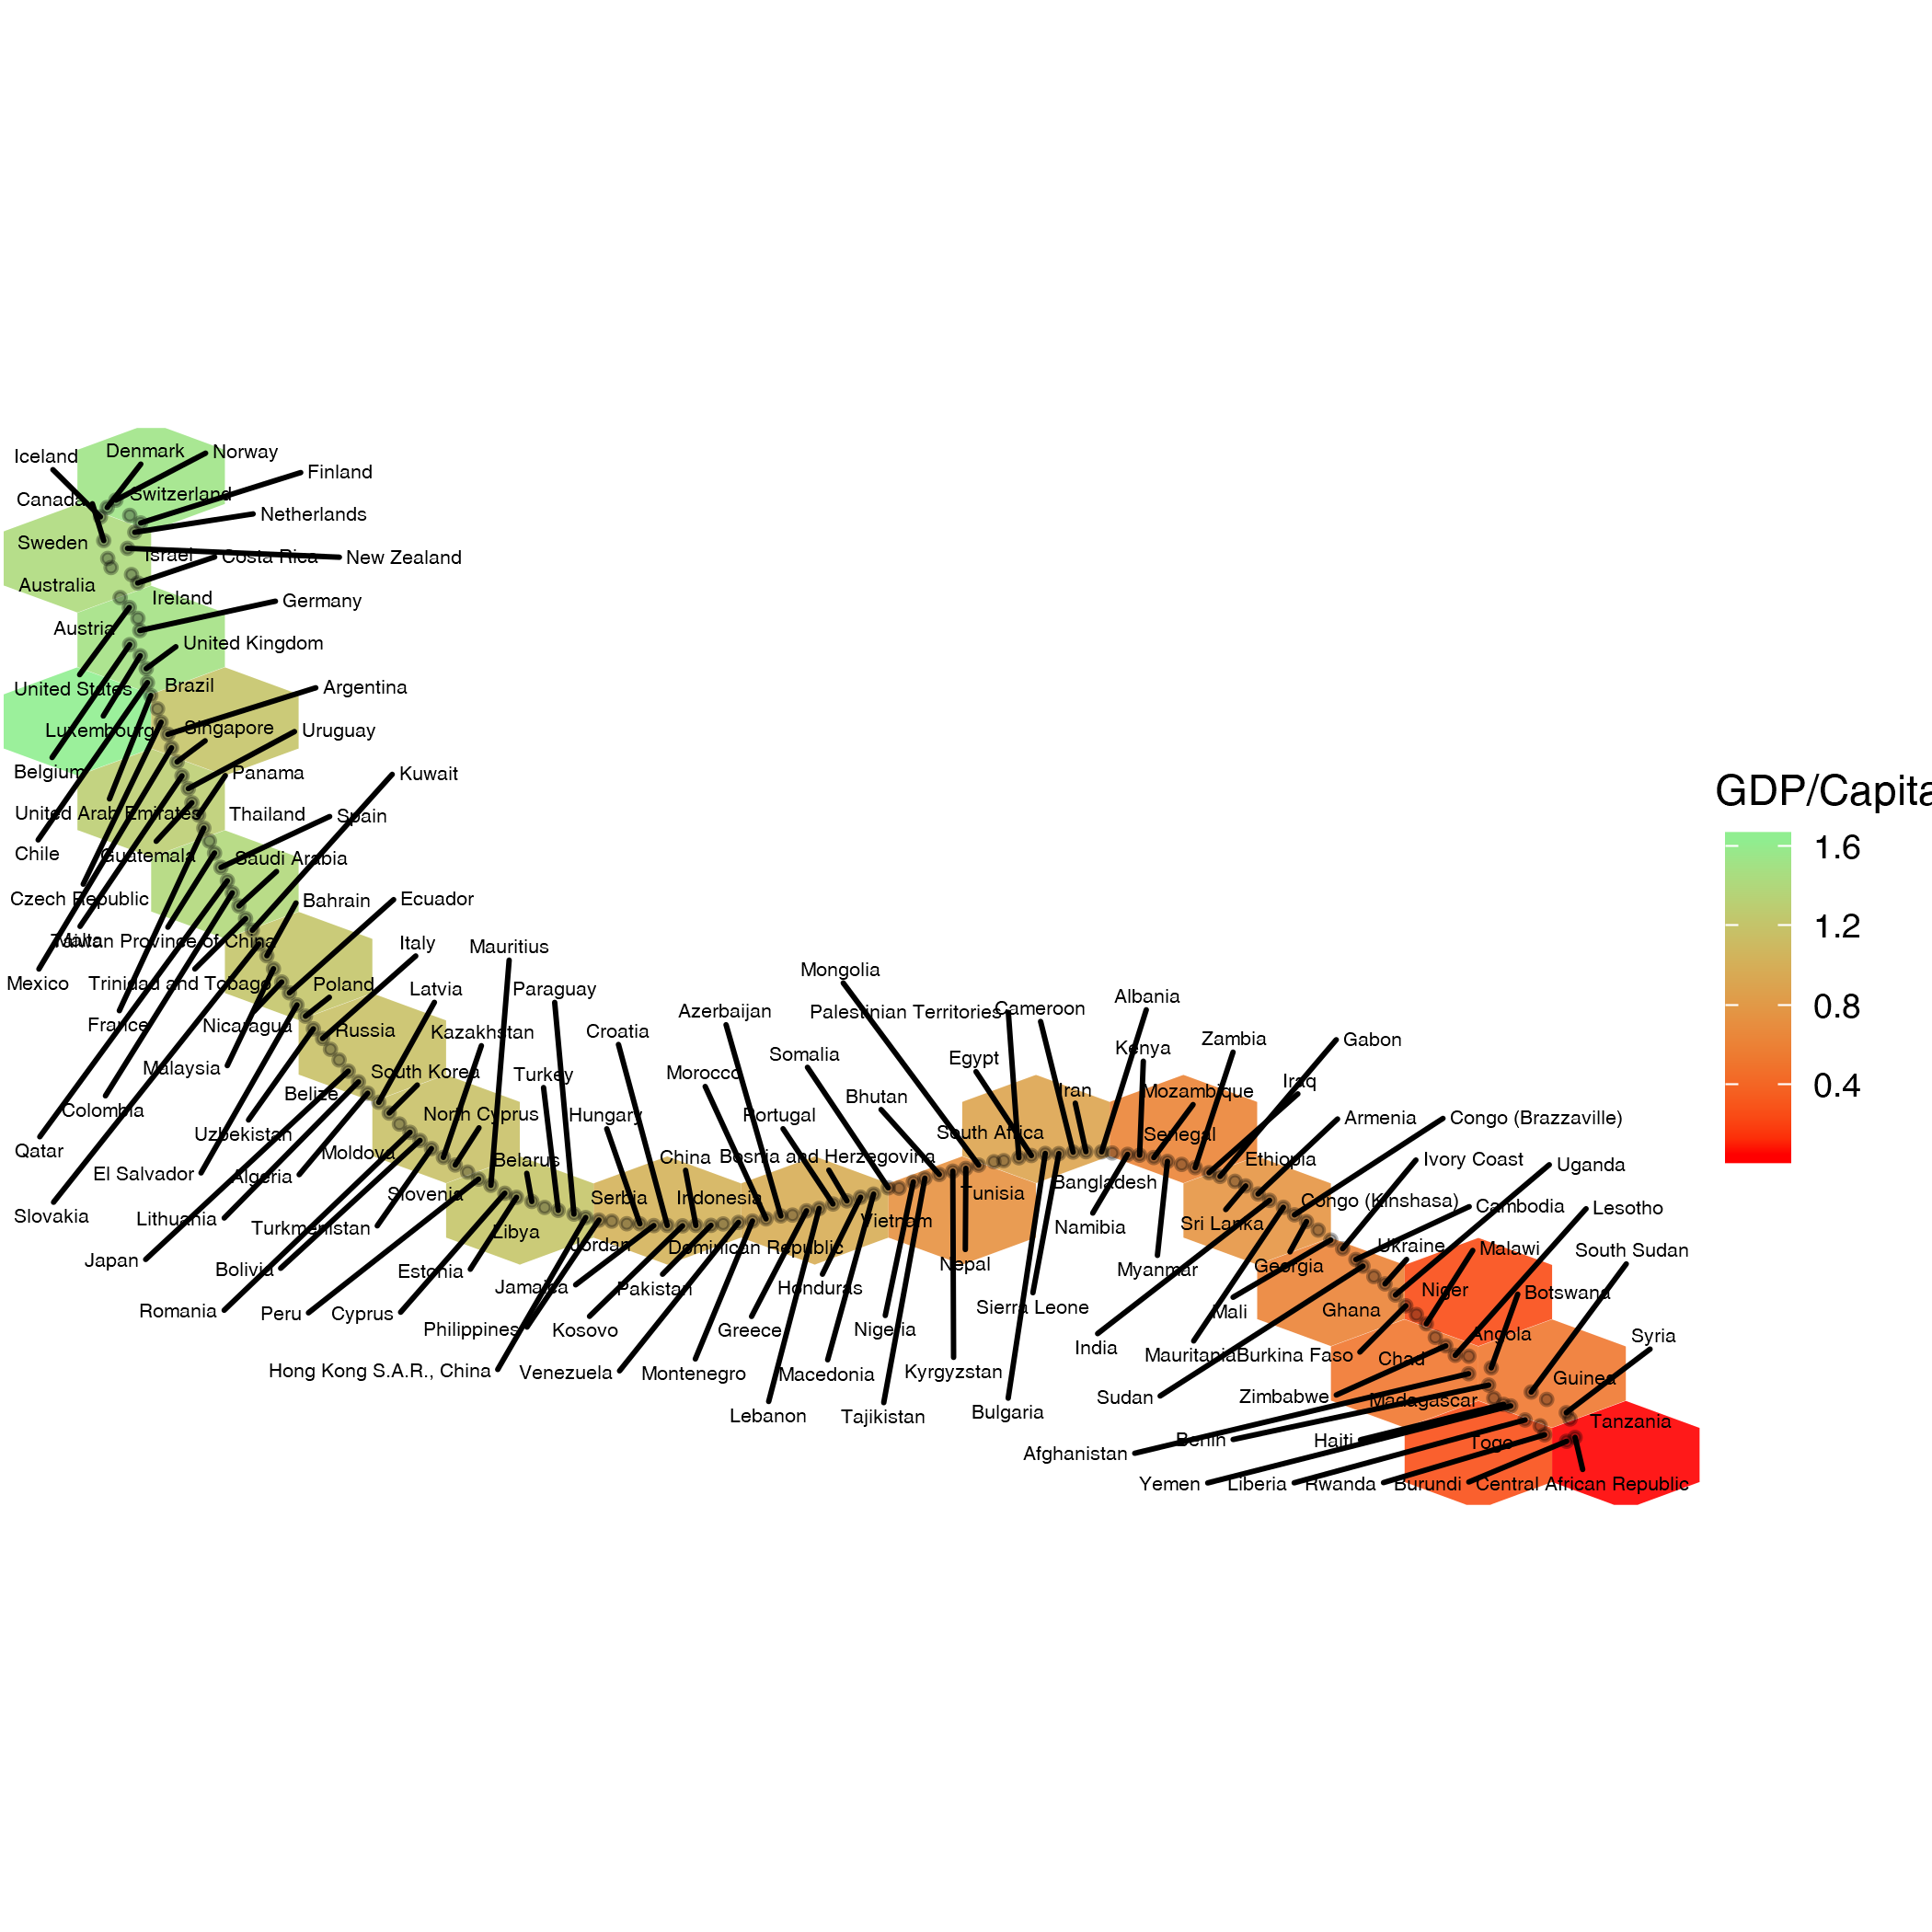

In [93]:
tsne_hexmap(name = "GDP/Capita", variable = "Economy..GDP.per.Capita.")